# <center> Chapter 5: Notebook Code </center>

Code Notebook for Lesson 5.

### Fashion-MNIST

### Get the data

Load library

In [1]:
library(readr)

Loading the data

In [2]:
train.data <- read_csv("../Datasets/Chapter5/fashion-mnist_train.csv",
                       col_types = cols(.default = "i"))
test.data <- read_csv("../Datasets/Chapter5/fashion-mnist_test.csv",
                      col_types = cols(.default = "i"))

Lets define the image rows length

In [5]:
img_rows <- img_cols <- 28

In order to do computation on the training data, we will transform it in a matrix (which are easier indexable) and we will separate pixels from labels

In [6]:
x_train <- as.matrix(train.data[, 2:dim(train.data)[2]])
y_train <- as.matrix(train.data[, 1])

We need to unflatten the data 

In [7]:
dim(x_train) <- c(nrow(x_train), img_rows, img_cols, 1) 

We will do the same to the test data

In [8]:
x_test <- as.matrix(test.data[, 2:dim(train.data)[2]])
y_test <- as.matrix(test.data[, 1])
dim(x_test) <- c(nrow(x_test), img_rows, img_cols, 1)

We will create an array for the products corresponding to each label

In [9]:
clothes.labels <-c( "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot")

In [27]:
# Function to rotate matrices
rotate <- function(x) t(apply(x, 2, rev))

# Function to plot image from a matrix x
plot_image <- function(x, title = "", title.color = "black") {
  dim(x) <- c(img_rows, img_cols)
  image(rotate(rotate(x)), axes = FALSE,
        col = grey(seq(0, 1, length = 256)),
        main = list(title, col = title.color))
}

### Naive Bayes

Import library "e1071"

In [11]:
library(e1071)

In [12]:
Naive_Bayes_Model=naiveBayes(as.factor(label)~., data=train.data)

In [140]:
Naive_Bayes_Model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
  0   1   2   3   4   5   6   7   8   9 
0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 

Conditional probabilities:
   pixel1
Y           [,1]       [,2]
  0 0.0013333333 0.09128496
  1 0.0000000000 0.00000000
  2 0.0000000000 0.00000000
  3 0.0026666667 0.20655911
  4 0.0006666667 0.05163978
  5 0.0000000000 0.00000000
  6 0.0033333333 0.18437612
  7 0.0000000000 0.00000000
  8 0.0010000000 0.04471390
  9 0.0000000000 0.00000000

   pixel2
Y           [,1]       [,2]
  0 0.0158333333 0.25611242
  1 0.0003333333 0.02581989
  2 0.0061666667 0.13465386
  3 0.0026666667 0.20655911
  4 0.0006666667 0.04082279
  5 0.0000000000 0.00000000
  6 0.0101666667 0.21618918
  7 0.0000000000 0.00000000
  8 0.0156666667 0.64587724
  9 0.0100000000 0.37628482

   pixel3
Y           [,1]       [,2]
  0 0.1438333333 1.31101682
  1 0.0006666667 0.04082279
  2 0.0396666667 0.71520

In [139]:
?naiveBayes

In [125]:
NB_Predictions=predict(Naive_Bayes_Model,test.data[,2:785])

Compute the test accuracy

In [138]:
sum(test.data$label==NB_Predictions)/dim(test.data)[1]

[1] 0.588

### Logistic Regression

Plot the logistic function

$$
\text{logistic}(t) = \frac{1}{1+e^{-t}}
$$

In [152]:
logistic = function(t) {
   1 / (1 + exp(-t))
}

In [153]:
t <- seq(-10, 10, 0.01)

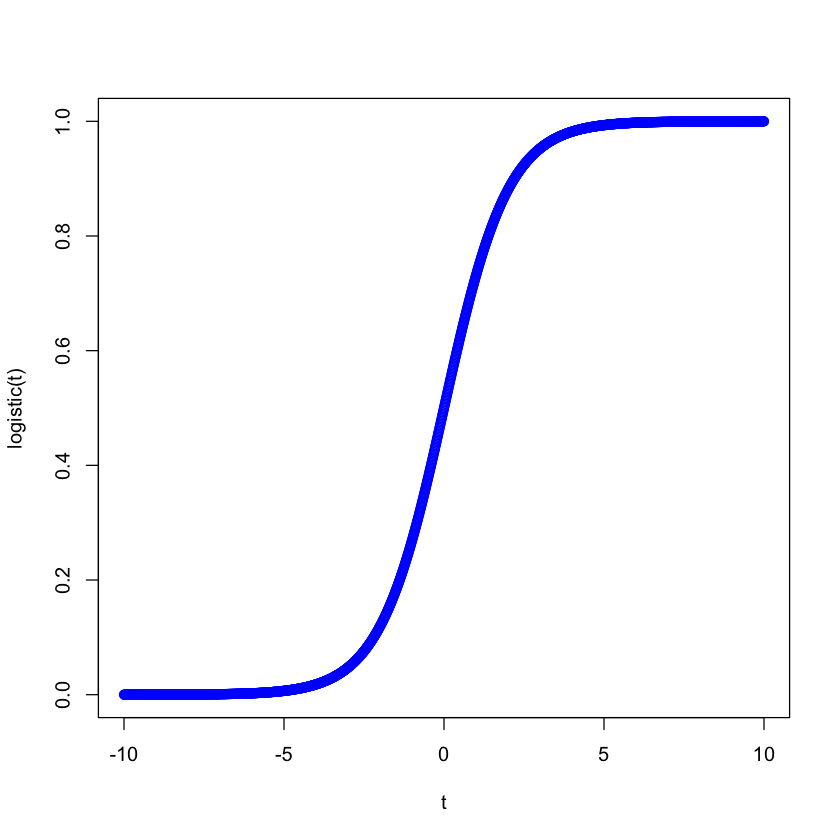

In [188]:
plot(t, logistic(t), col='blue')

Load the libraries

In [158]:
library(tidyverse)

In [163]:
library(nnet)

In [164]:
model <- multinom(label ~., family = "multinomial", data = train.data, MaxNWts =10000000, maxit=50);

# weights:  7860 (7065 variable)
initial  value 138155.105580 
iter  10 value 53171.139071
iter  20 value 37794.679430
iter  30 value 35066.192187
iter  40 value 33667.929889
iter  50 value 33118.528781
final  value 33118.528781 
stopped after 50 iterations


In [165]:
results <- predict(model, newdata=test.data, type='probs')

In [170]:
prediction <- max.col(results)
prediction <- prediction - 1
cl <- mean(prediction != test.data$label)
print(paste('Accuracy', 1 - cl))

[1] "Accuracy 0.8197"


### KNN

In [215]:
library(caret)
library(e1071)

Change the levels of the dependent variable (classes) to names labels in a new dataset to not overwrite our original

In [266]:
train <- train.data
test <- test.data

In [267]:
train$label <- as.factor(train$label)
test$label <- as.factor(test$label)

In [268]:
levels(train$label) <- make.names(levels(factor(train$label)))
levels(test$label) <- make.names(levels(factor(test$label)))

Use of repeated cross validation to find the best $k$, in terms of 3 sparate 10-fold validations.

In [272]:
# Setting up train controls
repeats = 3
numbers = 10
tunel = 10

set.seed(1234)
x = trainControl(method = "repeatedcv",
                 number = numbers,
                 repeats = repeats,
                 classProbs = TRUE)

In [270]:
help(trainControl)

Lets train the model

In [ ]:
model1 <- train(label~. , data = train, method = "knn",
               preProcess = c("center","scale"),
               trControl = x,
               metric = "ROC",
               tuneLength = tunel)

Warning message in train.default(x, y, weights = w, ...):
“The metric "ROC" was not in the result set. Accuracy will be used instead.”

In [ ]:
# Summary of model
model1
plot(model1)

Do the validation

In [228]:
# Validation
prediction <- predict(model1,test, type = "prob")

In [13]:
prediction <- max.col(prediction)
prediction <- prediction - 1
prediction <- make.names(levels(factor(prediction)))
cl <- mean(prediction != test.data$label)
print(paste('Accuracy', 1 - cl))

[1] "Accuracy 0.78"


### SVM

Load libraries

In [3]:
library(kernlab)
library(caret)
library(caTools)


Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha

Loading required package: lattice


Change to factor the label

In [4]:
train.data$label <- as.factor(train.data$label)
test.data$label <- as.factor(test.data$label)

##### Linear kernel

Lets try first with a linear kernel

In [ ]:
model1_linear <- ksvm(label ~ ., data = train.data, scaled = FALSE, kernel = "vanilladot", C = 1) 

In [ ]:
prediction1 <- predict(model1_linear, newdata = test.data, type = "response")

In [16]:
prediction1 <- max.col(prediction1)
prediction1 <- prediction1 - 1
prediction1 <- make.names(levels(factor(prediction1)))
cl <- mean(prediction1 != test.data$label)
print(paste('Accuracy', 1 - cl))

[1] "Accuracy 0.81"


Now, lets try the linear kernel, but uisn stricter $C$.

In [ ]:
model2_linear <- ksvm(label ~ ., data = train.data, scaled = FALSE, kernel = "vanilladot", C = 10)

In [ ]:
prediction2 <- predict(model2_linear, newdata = test.data, type = "response")

In [17]:
prediction2 <- max.col(prediction2)
prediction2 <- prediction2 - 1
prediction2 <- make.names(levels(factor(prediction2)))
cl <- mean(prediction2 != test.data$label)
print(paste('Accuracy', 1 - cl))

[1] "Accuracy 0.87"


To improve, lets use the radial based kernel RFB.

In [ ]:
model1_rbf <- ksvm(label ~ ., data = train.data, scaled = FALSE, kernel = "rbfdot", C = 1, kpar = "automatic")

In [ ]:
prediction3 <- predict(model1_rbf, newdata = test.data, type = "response")

In [20]:
prediction3 <- max.col(prediction3)
prediction3 <- prediction3 - 1
prediction3 <- make.names(levels(factor(prediction3)))
cl <- mean(prediction3 != test.data$label)
print(paste('Accuracy', 1 - cl))

[1] "Accuracy 0.9"


### Deep Convolutional Neural Network classifier (DCNN)

Load the libraries

In [8]:
library(readr)
library(keras)

Reshape the data. 

In [10]:
# Data is 28 pixels big in width and height
img_rows <- img_cols <- 28

#' Data is transformed to matrix (because they are easier indexable) and  pixels
#' are separated from labels.
x_train <- as.matrix(train.data[, 2:dim(train.data)[2]])
y_train <- as.matrix(train.data[, 1])
# Unflattening the data.
dim(x_train) <- c(nrow(x_train), img_rows, img_cols, 1) 

# The same for test set.
x_test <- as.matrix(test.data[, 2:dim(train.data)[2]])
y_test <- as.matrix(test.data[, 1])
dim(x_test) <- c(nrow(x_test), img_rows, img_cols, 1) 

Name of the labels

In [11]:
clothes.labels <-c( "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot")

**Neural network model**

Hyperparameters

In [12]:
batch_size <- 128
num_classes <- 10
epochs <- 13

Define the input shape and normalize the arrays with the maximum value

In [13]:
input_shape <- c(img_rows, img_cols, 1)

x_train <- x_train / 255
x_test <- x_test / 255

Lets convert class vectors to binary class matrices

In [14]:
y_train <- to_categorical(y_train, num_classes)
y_test <- to_categorical(y_test, num_classes)

Lets define the neural network model

The model will have 2 convolutional layers, and two densely 

In [21]:
model <- keras_model_sequential()
model %>%
  layer_conv_2d(filters = 32, kernel_size = c(5,5), activation = 'relu',
                input_shape = input_shape) %>%
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = 'relu') %>%
  layer_max_pooling_2d(pool_size = c(2, 2)) %>%
  layer_dropout(rate = 0.25) %>%
  layer_flatten() %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.5) %>%
  layer_dense(units = num_classes, activation = 'softmax')

In [29]:
model

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_3 (Conv2D)                   (None, 24, 24, 32)              832         
________________________________________________________________________________
conv2d_4 (Conv2D)                   (None, 22, 22, 64)              18496       
________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)      (None, 11, 11, 64)              0           
________________________________________________________________________________
dropout_3 (Dropout)                 (None, 11, 11, 64)              0           
________________________________________________________________________________
flatten_2 (Flatten)                 (None, 7744)                    0           
________________________________________________________________________________
dense_3 (Dense)       

Lets compile the model to then fit it

In [23]:
# compile model
model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_adadelta(),
  metrics = c('accuracy')
)

Lets fit the model

In [24]:
# train and evaluate
model %>% fit(
  x_train, y_train,
  batch_size = batch_size,
  epochs = epochs,
  verbose = 1,
  validation_data = list(x_test, y_test)
)

In [25]:
scores <- model %>% evaluate(
  x_test, y_test, verbose = 0
)
cat('Test loss:', scores[[1]], '\n')
cat('Test accuracy:', scores[[2]], '\n')

Test loss: 0.2008927 
Test accuracy: 0.928 


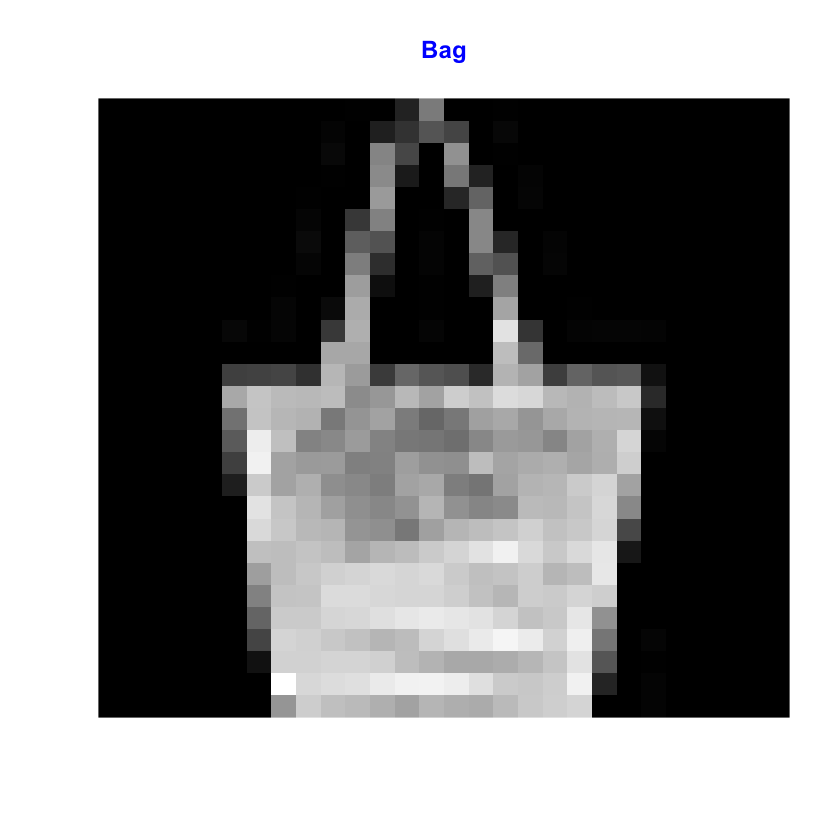

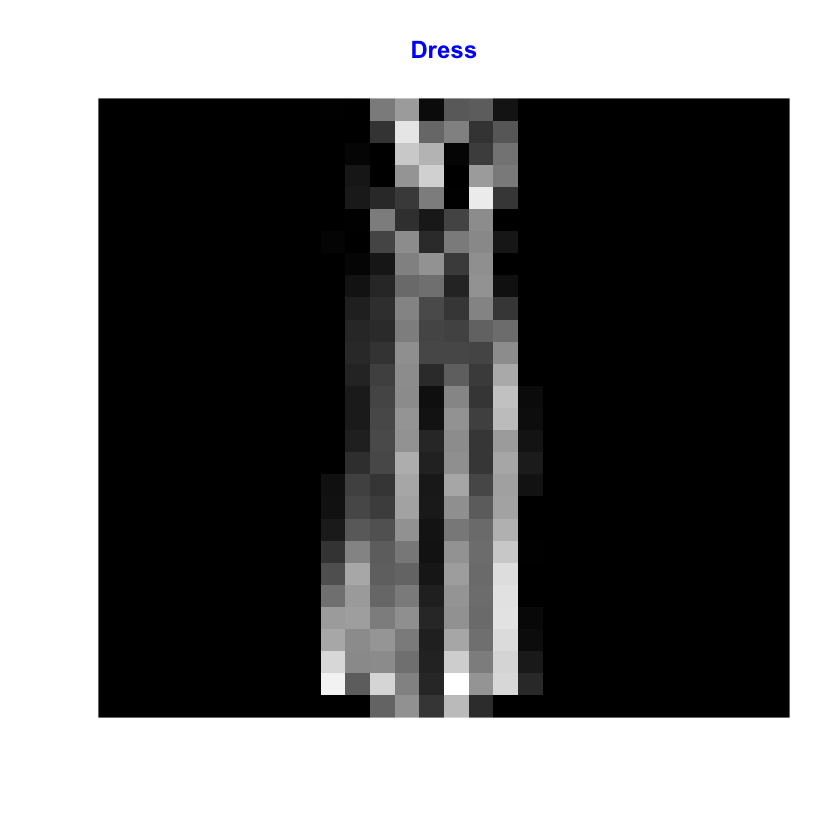

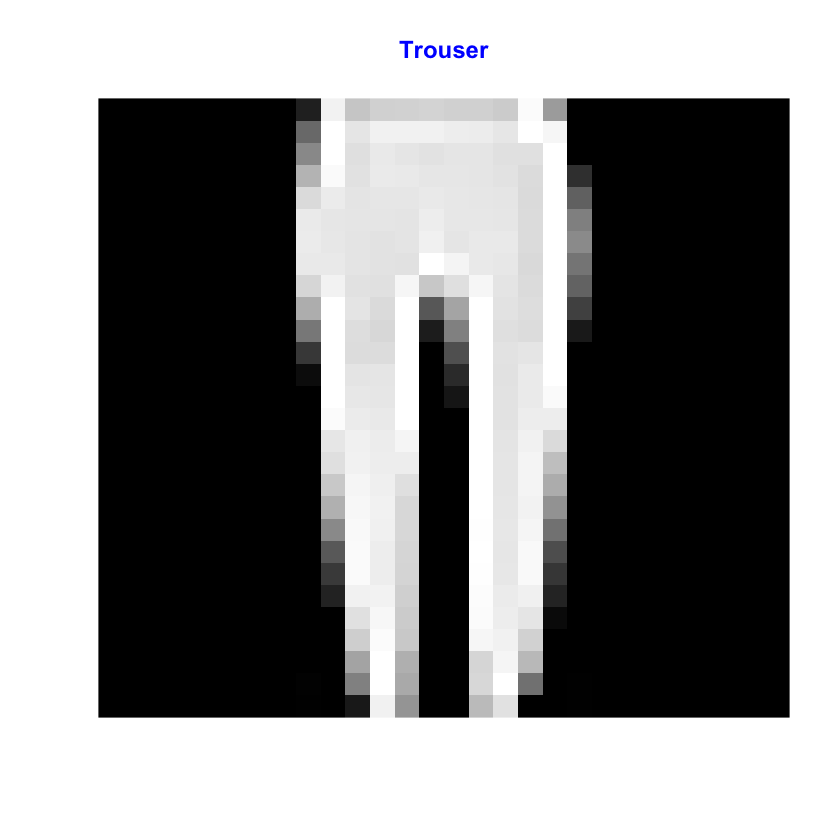

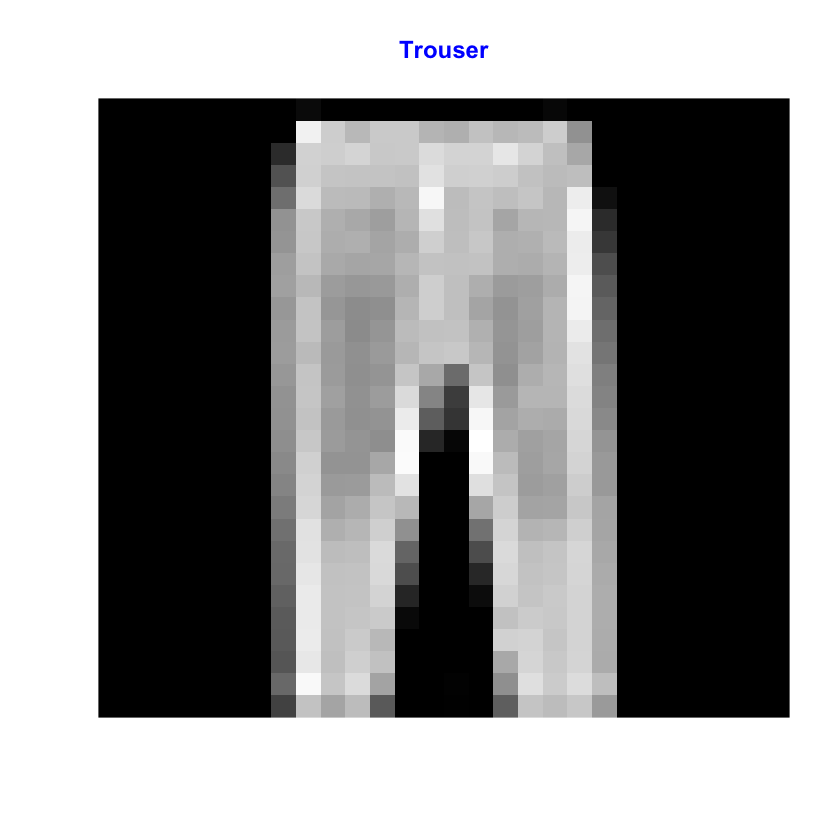

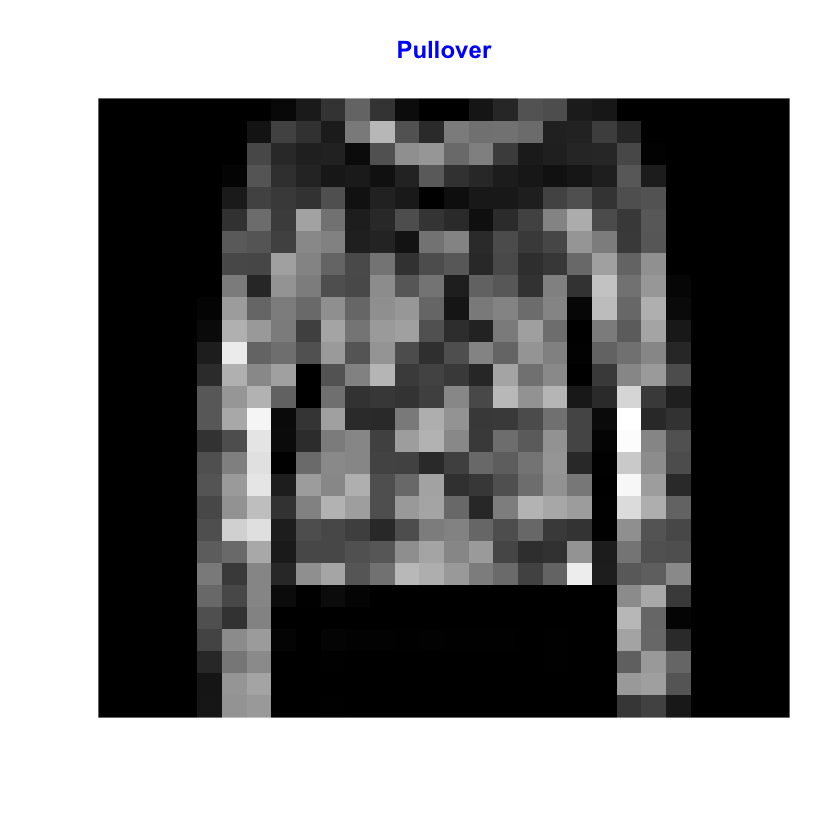

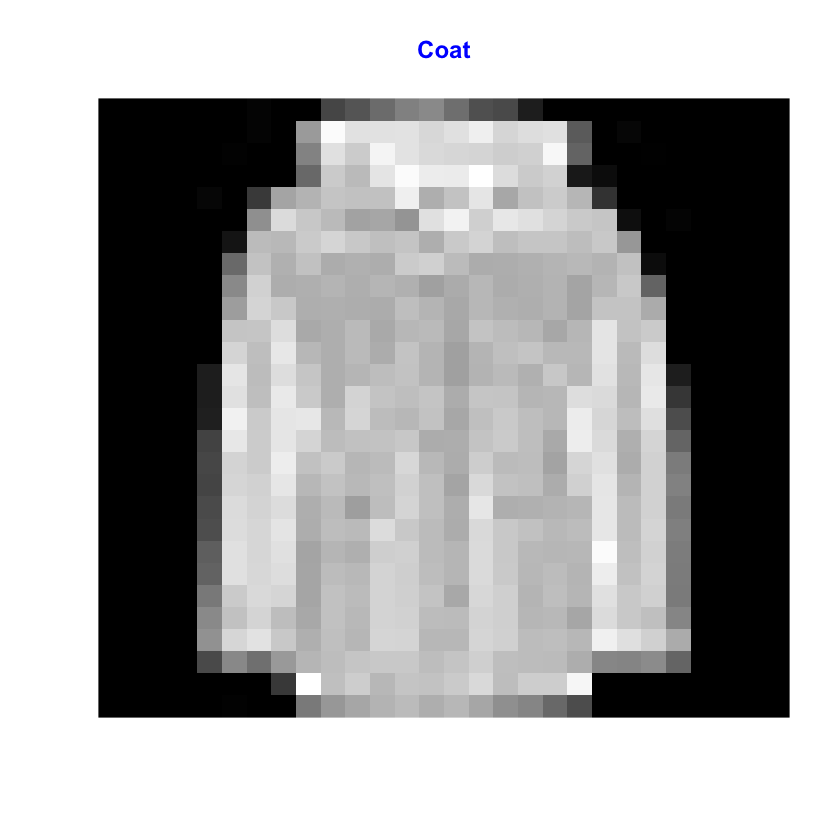

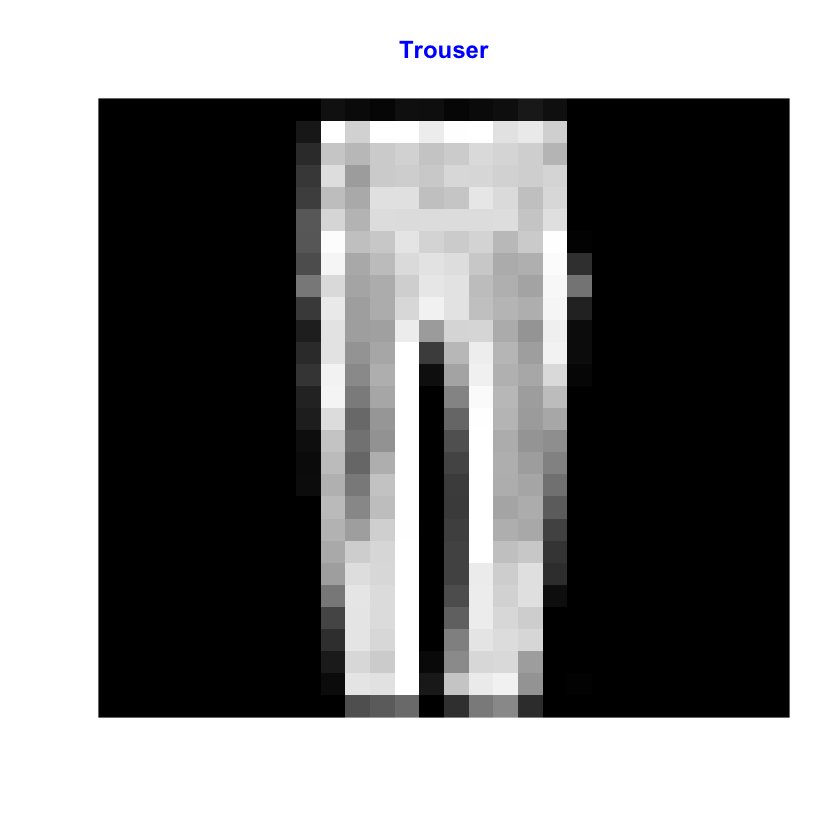

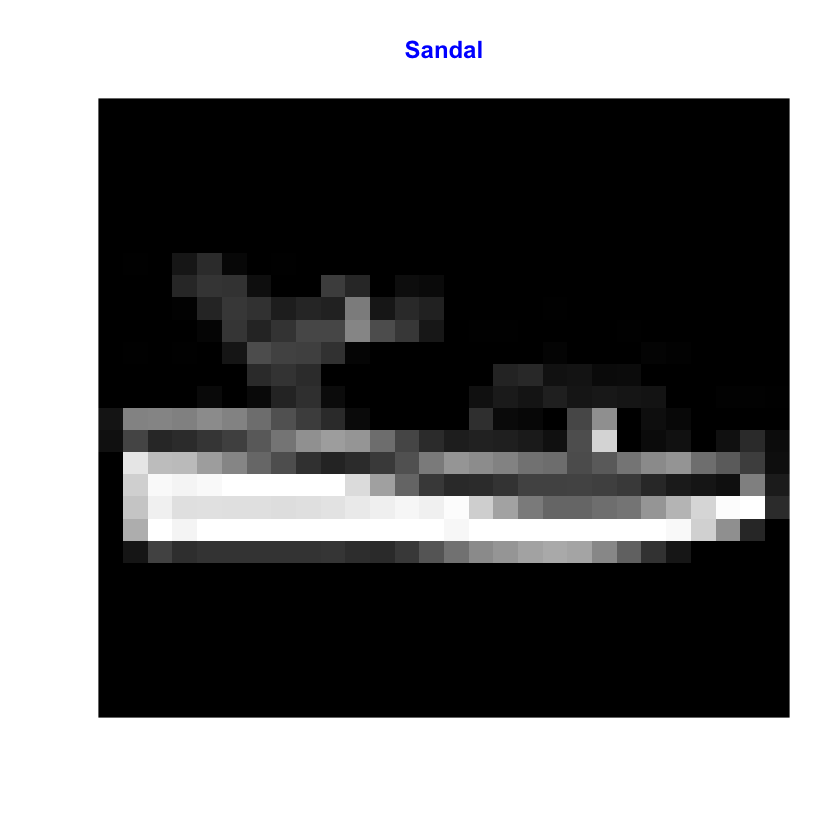

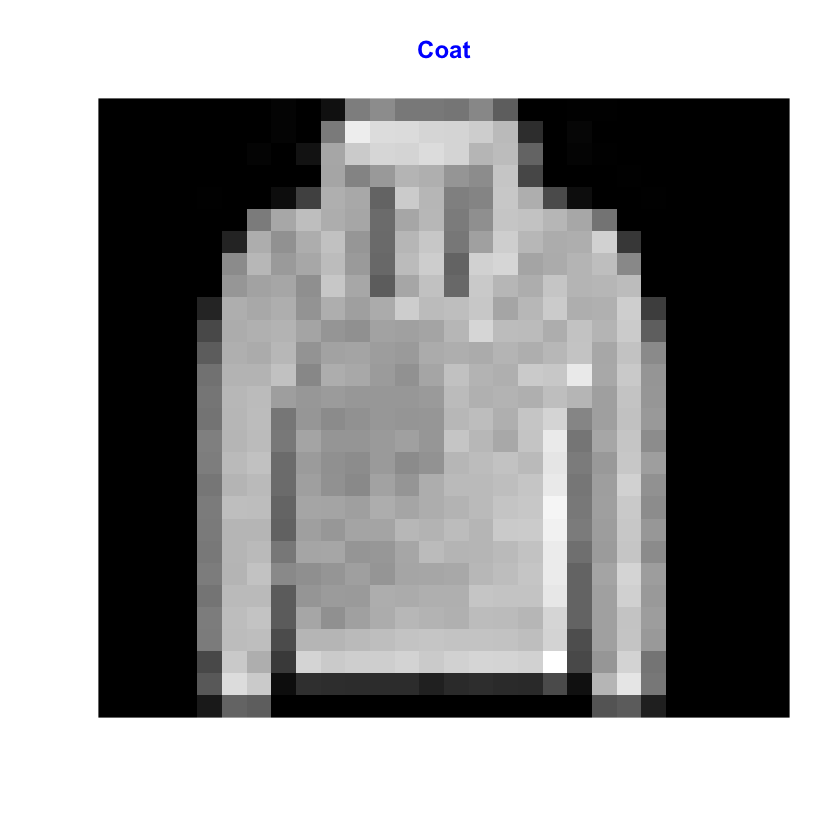

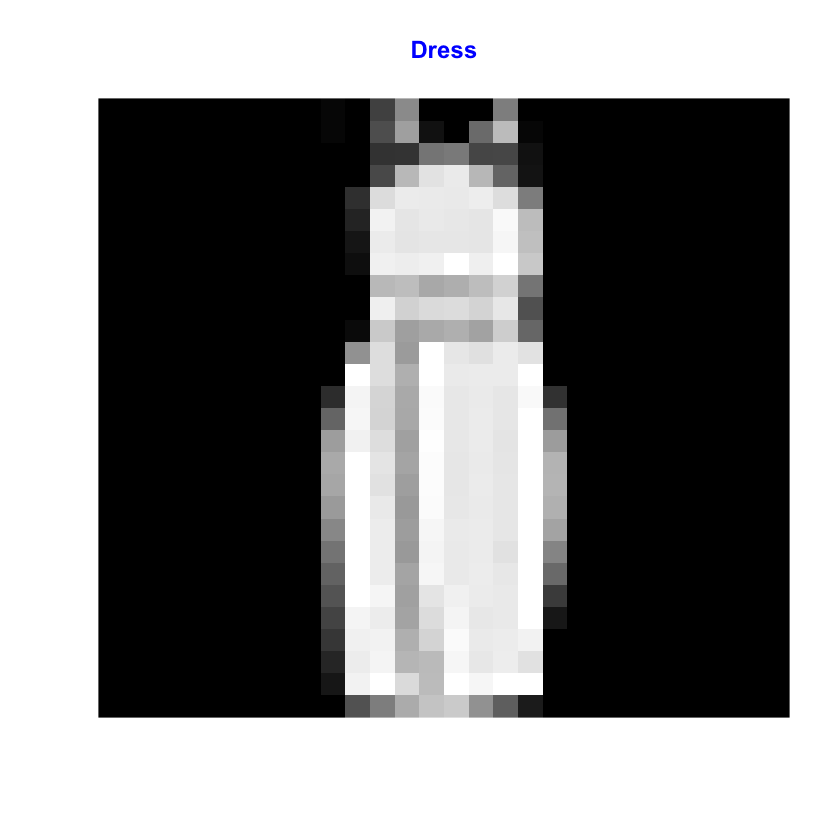

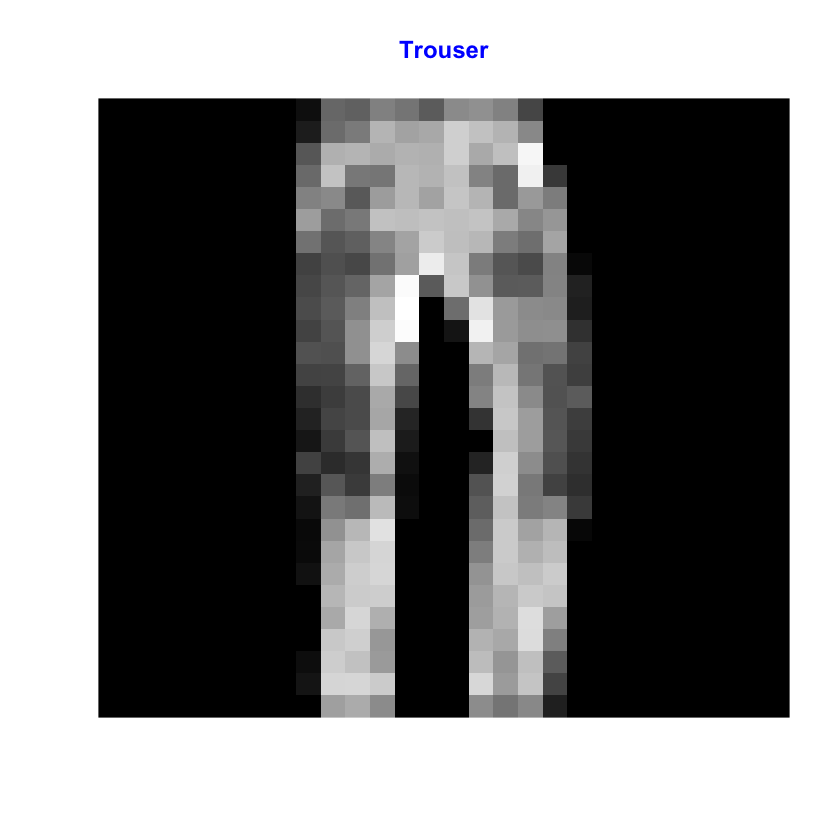

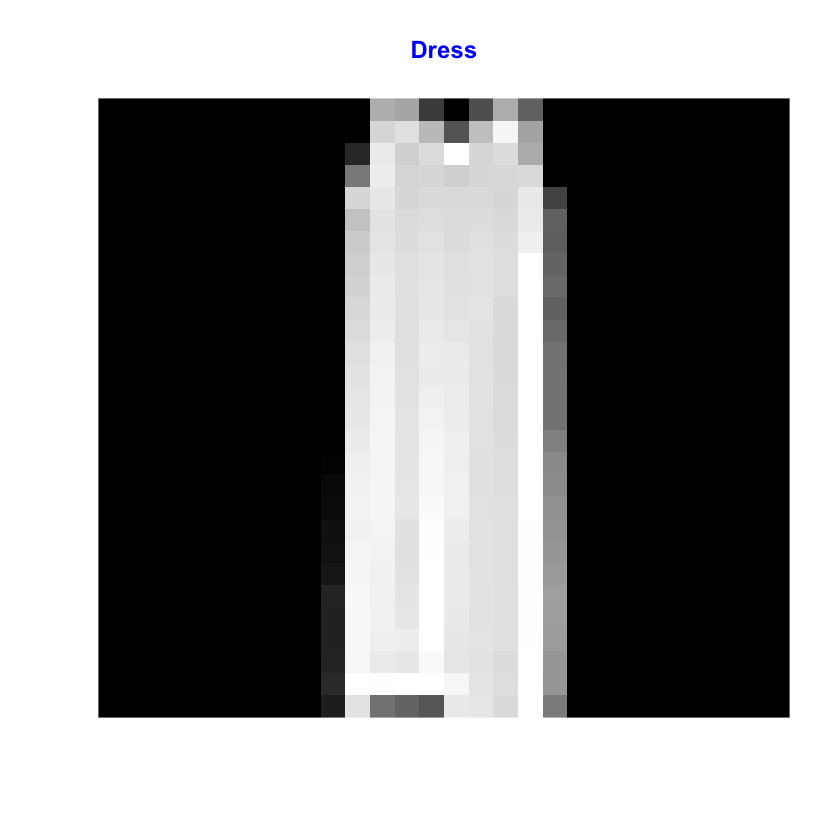

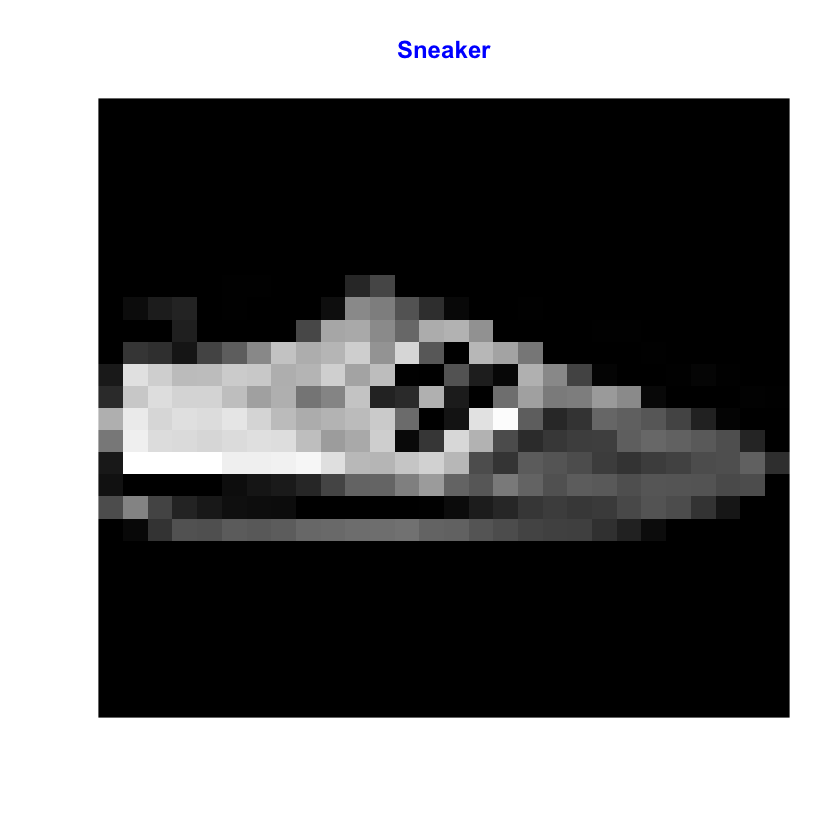

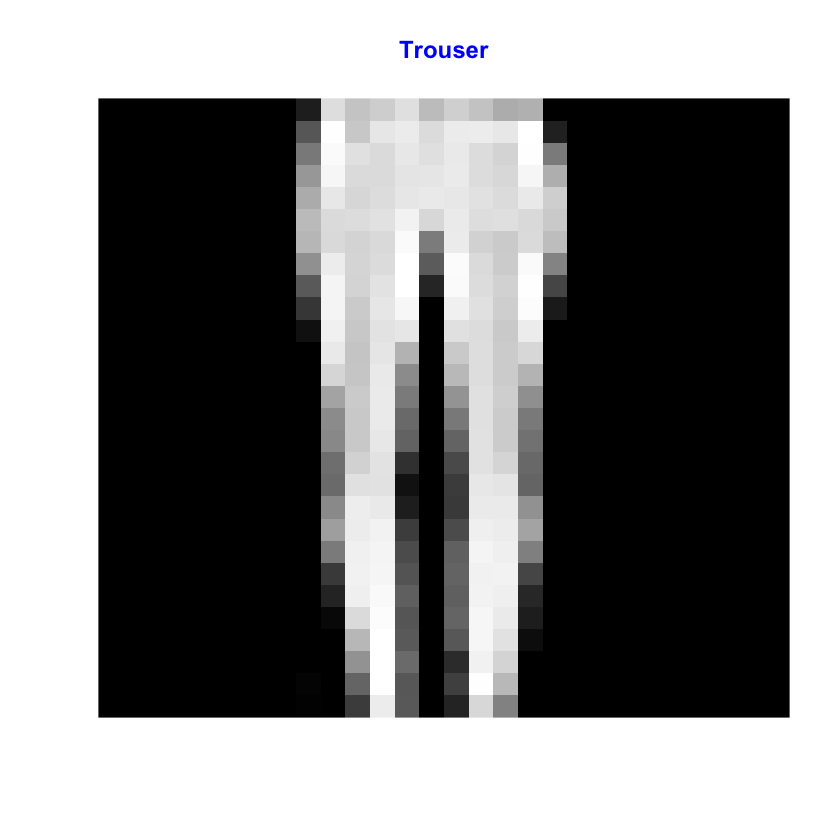

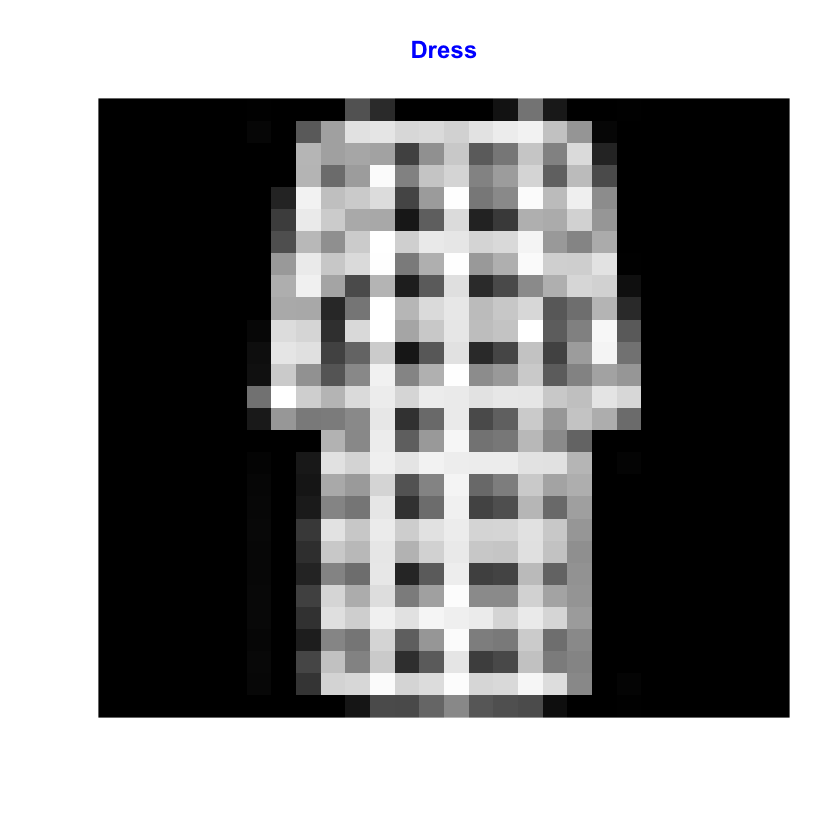

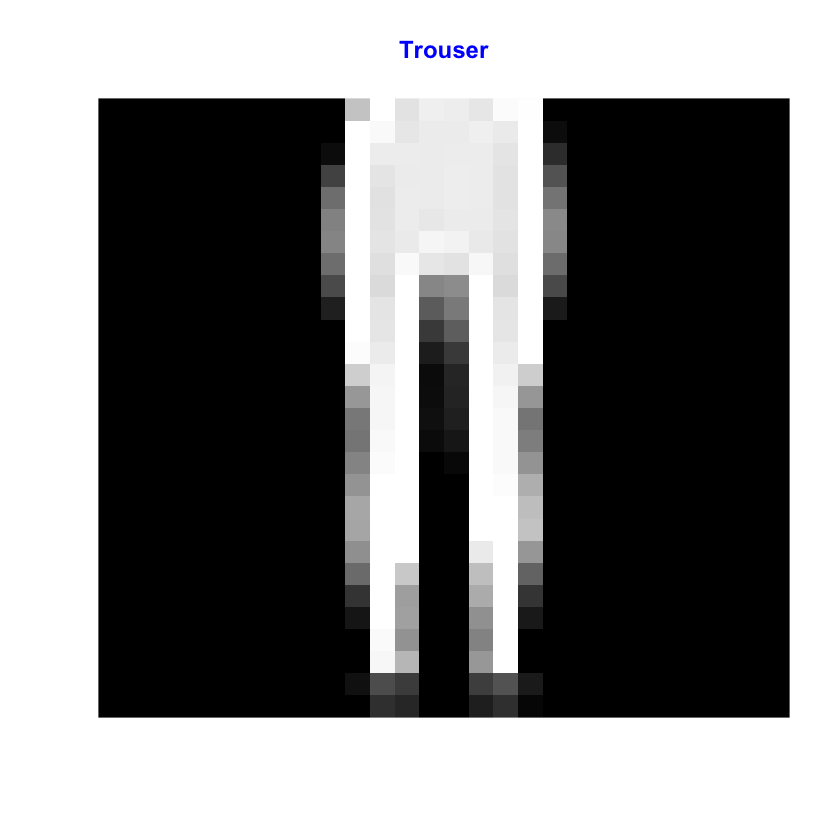

In [28]:
# Let's visually check a correctness of our model predictions.
for (i in 1:16) {
  nr <- i * 10
  tmpimg <- x_train[nr, , , 1]
  # input layers accepts 4D matrix
  dim(tmpimg) <- c(1, img_rows, img_cols, 1)
  pred <- model %>% predict(tmpimg)
  plot_image(x_train[nr, , , 1],
             clothes.labels[which.max(pred)],
             "blue")
}

par(mfrow=c(1, 1))